## Web scraping assignment 3

In [1]:
import selenium
import pandas as pd
from selenium import webdriver
import time

In [2]:
#Importing required modules
import selenium
import pandas as pd
from selenium import webdriver
import time

#Taking the input from user 
product_input=input("Enter the item you want to find: ")

#Initialising the driver
driver=webdriver.Chrome(r"I:\\chromedriver_win32\\chromedriver.exe")

#open the required website
driver.get("https://www.amazon.in/")
time.sleep(2)

#Finding the search bar in website
search_bar=driver.find_element_by_id('twotabsearchtextbox')
search_bar.send_keys(product_input)

#Finding and Clicking on the search button
search_button=driver.find_element_by_id("nav-search-submit-button")
search_button.click()

#Getting the links of pages
link=[]
page_links=driver.find_elements_by_xpath("//ul[@class='a-pagination']/li/a")
for links in page_links:
    link.append(links.get_attribute('href'))
if len(link)>=3:
    link=link[:3]
else:
    link=link
link

#Making empty lists of reuired items to be fetched
brand=[]
product=[]
rating=[]
num_ratings=[]
price=[]
exchange=[]
expected_delivery=[]
availability=[]
other_details=[]
product_url=[]

#Getting links of all products in each page
for i in link:
    products_link=driver.find_elements_by_xpath('//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-2"]/a[1]')
    for products in products_link:
        product_url.append(products.get_attribute("href"))
print("Length of product links:",len(product_url))

print("Getting the other details")
for url in product_url:
    driver.get(url)
    #Getting the brand name: 
    try:
        brand_tag=driver.find_element_by_xpath('//*[@id="productOverview_feature_div"]/div/table/tbody/tr[3]/td[2]/span')
        brand.append(brand_tag.text)
    except:
        brand.append("-")
  
    #Getting the model name: 
    try:
        model_tag=driver.find_element_by_xpath('//*[@id="productOverview_feature_div"]/div/table/tbody/tr[1]/td[2]/span')
        product.append(model_tag.text)
    except:
        product.append("-")

    #Getting the ratings
    try:
        ratings_details=driver.find_element_by_xpath('//*[@id="reviewsMedley"]/div/div[1]/div[2]/div[1]/div/div[2]/div/span/span')
        ratings=ratings_details.text.split(" ")
        rating.append(ratings[0])
    except:
        rating.append("-")
  
    #Getting the no. of ratings
    try:
        num_of_ratings=driver.find_element_by_xpath('//*[@id="acrCustomerReviewText"]')
        num=num_of_ratings.text.split(" ")
        num_ratings.append(num[0])
    except:
        num_ratings.append("-")
        
    #Getting the price
    try:
        price_details=driver.find_element_by_xpath("//div[@id='price']/table/tbody/tr[2]/td[2]")
        price.append(price_details.text)
    except:
        price.append("-")

    #Getting the availability details
    try:
        availability_details=driver.find_element_by_xpath('//*[@id="availability"]/span')
        availability.append(availability_details.text)
    except:
        availability.append("-")

    #Getting the remaining details
    try:
        remaining_details=driver.find_element_by_xpath('//*[@id="feature-bullets"]')
        other_details.append(remaining_details.text.replace("\n","").strip())
    except:
        other_details.append("-")
       
    #Getting the expected delivery date
    try:
        delivery_date=driver.find_element_by_xpath('//*[@id="ddmDeliveryMessage"]')
        expected_delivery.append(delivery_date.text)
    except:
        expected_delivery.append("-")
          
    #Getting the exchange details
    try:
        exchange_tag=driver.find_element_by_xpath('//*[@id="RETURNS_POLICY"]/span/div[2]/a')
        exchange.append(exchange_tag.text)
    except:
        exchange.append('-')

driver.close()          
print("Length of Brand:",len(brand))
print("Length of Product:",len(product))
print("Length of rating:",len(rating))
print("Length of num_ratings:",len(num_ratings))
print("Length of price:",len(price))
print("Length of other_details:",len(other_details))
print("Length of expected_delivery:",len(expected_delivery))
print("Length of availability:",len(availability))
print('Length of exchange:',len(exchange))

amazon=pd.DataFrame({})
amazon['Brand']=brand
amazon['Name']=product
amazon['Rating']=rating
amazon['No. Of Ratings']=num_ratings
amazon['Price']=price
amazon['Delivery']=expected_delivery
amazon['Availability']=availability
amazon['Details']=other_details
amazon['Exchange']=exchange
amazon['Product link']=product_url
print("Fetching successfull")
print('saved to csv')
amazon.to_csv('amazon'+product_input+'.csv')


Enter the item you want to find: mobiles
Length of product links: 75
Getting the other details
Length of Brand: 75
Length of Product: 75
Length of rating: 75
Length of num_ratings: 75
Length of price: 75
Length of other_details: 75
Length of expected_delivery: 75
Length of availability: 75
Length of exchange: 75
Fetching successfull
saved to csv


In [3]:
amazon.to_csv('amazon'+product_input+'.csv')

### Q3. Getting images from google -fruits, cars & ML

In [90]:
import os
import selenium
from selenium import webdriver
import time
from PIL import Image
import io
import requests
from selenium.common.exceptions import ElementClickInterceptedException

Message: element click intercepted: Element  is not clickable at point (277, 98). Other element would receive the click: <a href="/search?q=Fruits&amp;tbm=isch&amp;hl=en&amp;chips=q:fruits,g_1:orange:_gIsM79y13E%3D&amp;bih=575&amp;biw=1034&amp;sa=X&amp;ved=2ahUKEwjz6Li-6OPzAhXFsksFHXbxBGgQ4lYoAnoECAEQEw" data-navigation="server" jslog="11106" aria-label="orange" class="F9PbJd IJRrpb xKddTc">...</a>
  (Session info: chrome=94.0.4606.81)

Message: element click intercepted: Element  is not clickable at point (520, 107). Other element would receive the click: <div class="qs41qe" style="overflow: hidden; height: 68px; margin-bottom: -10px;">...</div>
  (Session info: chrome=94.0.4606.81)

Message: element click intercepted: Element  is not clickable at point (839, 107). Other element would receive the click: <div class="qs41qe" style="overflow: hidden; height: 68px; margin-bottom: -10px;">...</div>
  (Session info: chrome=94.0.4606.81)

Message: element click intercepted: Element  is not c
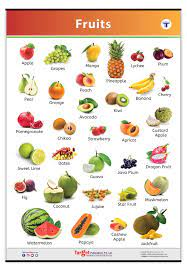
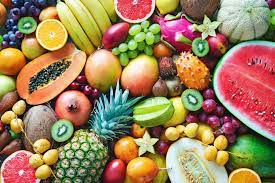
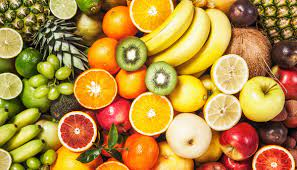
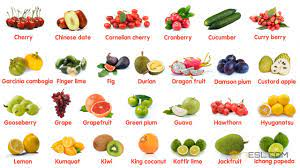

C:\Users\Lucky Girish\anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


SAVED - https://www.dole.com/-/media/project/dole/produce-images/headers/dole-produce-fruit-medley.png?h=630&w=1200&rev=1416123f2d094cd1b7494365948214be&hash=52F3DBCB5BDC2F5C3528358D1ABF9D2E - AT: K:\New folder\                                                                                                                                                    77.jpg
SAVED - https://www.worldatlas.com/r/w1200/upload/46/cb/e1/shutterstock-252338818.jpg - AT: K:\New folder\                                                                                                                                                    78.jpg
SAVED - https://cdn.shopify.com/s/files/1/1083/2612/articles/unnamed_f90c01d0-7d04-49ee-bd64-32653cf34842_1092x.png?v=1588625623 - AT: K:\New folder\                                                                                                                                                    79.jpg
SAVED - https://upload.wikimedia.org/wikipedia/commons/2/2f/Blackberr

In [103]:
#Initialising the driver
driver=webdriver.Chrome(r"I:\\chromedriver_win32\\chromedriver.exe")
driver.get('https://www.google.co.in/imghp?hl=en&ogbl')
time.sleep(5)

#scraping images of fruits
search_bar=driver.find_element_by_name('q')
search_bar.send_keys('Fruits')

search=driver.find_element_by_xpath('//button[@class="Tg7LZd"]')
search.click()

#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

#Locate the images to be scraped from the current page 
imgResults = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)
        
os.chdir('K:/New folder')
baseDir=os.getcwd()

for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content
        
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

In [ ]:
#Initialising the driver
driver=webdriver.Chrome(r"I:\\chromedriver_win32\\chromedriver.exe")
driver.get('https://www.google.co.in/imghp?hl=en&ogbl')
time.sleep(5)

#scraping images of fruits
search_bar=driver.find_element_by_name('q')
search_bar.send_keys('Machine Learning')

search=driver.find_element_by_xpath('//button[@class="Tg7LZd"]')
search.click()

#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

#Locate the images to be scraped from the current page 
imgResults = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)
        
os.chdir('K:/Cars/ML')
baseDir=os.getcwd()

for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content
        
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeiUy2XO2UMy9OVhMEg8U5G9v_9l6vJKoMOw&usqp=CAU - AT: K:\Cars\cars\                                                                                                                                                     0.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS9tNWA9jrkFikCj-_MtuDBIesg2APINoXApg&usqp=CAU - AT: K:\Cars\cars\                                                                                                                                                     1.jpg
SAVED - https://www.daimler.com/bilder/produkte/pkw/mercedes-benz/cla/neuer-cla/18c0973-028-w768xh1536-cutout.jpg - AT: K:\Cars\cars\                                                                                                                                                     2.jpg
SAVED - https://upload.wikimedia.org/wikipedia/en/thumb/7/7f/Cars_2_Poster.jpg/220px-Cars_2_Poster.jpg - AT: K:\Cars\cars\                          

In [ ]:
#Initialising the driver
driver=webdriver.Chrome(r"I:\\chromedriver_win32\\chromedriver.exe")
driver.get('https://www.google.co.in/imghp?hl=en&ogbl')
time.sleep(5)

#scraping images of fruits
search_bar=driver.find_element_by_name('q')
search_bar.send_keys('machine learning')

search=driver.find_element_by_xpath('//button[@class="Tg7LZd"]')
search.click()

#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

#Locate the images to be scraped from the current page 
imgResults = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)
        
os.chdir('K:/Cars/ML')
baseDir=os.getcwd()

for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content
        
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

### q4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page.Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [63]:
from selenium.common.exceptions import NoSuchElementException

#Taking the input from user 
product=input("Enter the item you want to find: ")

#Initialising the driver
driver=webdriver.Chrome(r"I:\\chromedriver_win32\\chromedriver.exe")

#open the required website
driver.get("https://www.flipkart.com/")
time.sleep(3)

#Closing the popup
try:
    popup=driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']")
    popup.click()
except:
    pass

#Finding the search bar in website
search_bar=driver.find_element_by_name('q')
search_bar.send_keys(product)

#Finding and Clicking on the search button
search_button=driver.find_element_by_class_name("L0Z3Pu")
search_button.click()
driver.implicitly_wait(1)

links=[]

#Getting the links of all products
productlinks=driver.find_elements_by_xpath("//div[@class='_1AtVbE col-12-12']/div[1]/div[1]/div[1]/a[1]")
for i in productlinks:
    links.append(i.get_attribute('href'))

print(len(links))

brand=[]
mobile=[]
color=[]
ram=[]
rom=[]
pcam=[]
fcam=[]
ds=[]
dr=[]
proc=[]
core=[]
bat=[]
price=[]


#Brand
brand_details=driver.find_elements_by_xpath('//div[@class="_4rR01T"]')
for i in brand_details:
    brands=i.text.split(' ')
    brand.append(brands[0])

#Mobile name
try:
    mobile_name=driver.find_elements_by_xpath('//div[@class="_4rR01T"]')
    for i in mobile_name:
        mobile.append(i.text)
except:
    mobile.appenb('-')
    
#Price details
try:
    prices=driver.find_elements_by_xpath('//div[@class="_3tbKJL"]/div[1]/div[1]')
    for i in prices:
        price.append(i.text)
except:
    price.append('-')

#Ram details
try:
    ram_details=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[1]")
    rams=[i.text.split('|') for i in ram_details]
    for i in rams:
        if len(i)>1:
            ram.append(i[0])
        else:
            ram.append('-')
except:
    ram.append('-')

try:
    for i in rams:
        if len(i)>1:
            rom.append(i[1])
        else:
            rom.append('-')
except:
    rom.append('-')
print(len(ram), len(rom))


 #Getting Display
try:
    display_size=driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]/li[2]')
    for i in display_size:
        ds.append(i.text)
except:
    ds.append('-')


#Camera details
try:
    cam_details=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[3]")
    cams=[i.text.split('|') for i in cam_details]
    for i in cams:
        if len(i)>1:
            pcam.append(i[0])
        else:
            pcam.append('-')
except:
    pcam.append('-')

try:
    for i in cams:
        if len(i)>1:
            fcam.append(i[1])
        else:
            fcam.append('-')
except:
    fcam.append('-')
print(len(pcam), len(fcam))
      
#Battery details
try:
    bat_details=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[4]")
    for i in bat_details:
        bat.append(i.text)
except:
    bat.append('-')

#Accesing the each link
for link in links:
    driver.get(link)
    time.sleep(3)
    
    
    #Readmore option
    try:
        rdmore=driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]').click()
        time.sleep(2)
    except NoSuchElementException:
        pass
    
    #Getting color
    try:
        colors=driver.find_element_by_xpath('//div[@class="_1UhVsV _3AsE0T"]/div[1]/table[1]/tbody/tr[4]/td[2]')
        color.append(colors.text)
    except:
        color.append('-')
        
    #Getting display resolution
    try:
        display_resolution=driver.find_element_by_xpath('//div[@class="_1UhVsV"]/div[2]/table[1]/tbody/tr[2]/td[2]')
        dr.append(display_resolution.text)
    except:
        dr.append('-')
        
    #Getting core details
    try:
        cores=driver.find_element_by_xpath('//div[@class="_1UhVsV"]/div[3]/table[1]/tbody/tr[3]/td[2]')
        core.append(cores.text)
    except:
        core.append('-')
        
    #Processor details
    try:
        proc_details=driver.find_element_by_xpath("//div[@class='_2418kt']/ul/li[5]")
        proc.append(proc_details.text)
    except:
        proc.append('-')
        
                
#Creating and entering dataframe
flipkart=pd.DataFrame({})
flipkart['Brand']=brand
flipkart['Mobile']=mobile
flipkart['Color']=color
flipkart['Ram']=ram
flipkart['Storage']=rom
flipkart['Primary camera']=pcam
flipkart['Front camera']=fcam
flipkart['Display']=ds
flipkart['Display Resolution']=dr
flipkart['Processor']=proc
flipkart['Processor core']=core
flipkart['Battery']=bat
flipkart['Price']=price
flipkart['Product_url']=links   
flipkart.to_csv('flipkart-'+product+'.csv')
flipkart        
    


Enter the item you want to find: vivo
40
40 40
40 40


,Brand,Mobile,Color,Ram,Storage,Primary camera,Front camera,Display,Display Resolution,Processor,Processor core,Battery,Price,Product_url
0,vivo,"vivo Y20G 2021 (Obsidian Black, 64 GB)",-,4 GB RAM,64 GB ROM,13MP + 2MP + 2MP,8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,1600 x 720 Pixels,MediaTek Helio P35 Processor,Octa Core,5000 mAh Li-ion Battery,"₹13,990",https://www.flipkart.com/vivo-y20g-2021-obsidi...
1,vivo,"vivo Y12s (Glacier Blue, 32 GB)",-,3 GB RAM,32 GB ROM,13MP + 2MP,8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,1600 x 720 Pixels,Snapdragon 439 Processor,Octa Core,5000 mAh Li-ion Battery,"₹10,990",https://www.flipkart.com/vivo-y12s-glacier-blu...
2,vivo,"vivo Y12s (Phantom Black, 32 GB)",-,3 GB RAM,32 GB ROM,13MP + 2MP,8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,1600 x 720 Pixels,Snapdragon 439 Processor,Octa Core,5000 mAh Li-ion Battery,"₹10,990",https://www.flipkart.com/vivo-y12s-phantom-bla...
3,vivo,"vivo Y20G (Obsidian Black, 64 GB)",-,4 GB RAM,64 GB ROM,13MP + 2MP + 2MP,8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,1600 x 720 Pixels,MediaTek Helio G80 Processor,Octa Core,5000 mAh Li-ion Battery,"₹13,990",https://www.flipkart.com/vivo-y20g-obsidian-bl...
4,vivo,"vivo Y33s (Midday Dream, 128 GB)",-,8 GB RAM,128 GB ROM,50MP + 2MP + 2MP,16MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,2408 x 1080 Pixels,MediaTek Helio G80 Processor,Octa Core,5000 mAh Lithium Battery,"₹18,990",https://www.flipkart.com/vivo-y33s-midday-drea...
5,vivo,"vivo Y33s (Mirror Black, 128 GB)",-,8 GB RAM,128 GB ROM,50MP + 2MP + 2MP,16MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,2408 x 1080 Pixels,MediaTek Helio G80 Processor,Octa Core,5000 mAh Lithium Battery,"₹18,990",https://www.flipkart.com/vivo-y33s-mirror-blac...
6,vivo,"vivo Y20A 2021 (Nebula Blue, 64 GB)",-,3 GB RAM,64 GB ROM,13MP + 2MP + 2MP,8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,1600 x 720 Pixels,Qualcomm Snapdragon 439 Processor,Octa Core,5000 mAh Battery,"₹11,990",https://www.flipkart.com/vivo-y20a-2021-nebula...
7,vivo,"vivo Y20G 2021 (Purist Blue, 64 GB)",-,4 GB RAM,64 GB ROM,13MP + 2MP + 2MP,8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,-,-,-,5000 mAh Li-ion Battery,"₹13,990",https://www.flipkart.com/vivo-y20g-2021-purist...
8,vivo,vivo Wall Charger Accessory Combo for Vivo Y11...,-,-,-,-,-,White,-,-,-,"Contains: Wall Charger, Headphone",₹299,https://www.flipkart.com/vivo-wall-charger-acc...
9,vivo,"vivo Y72 5G (Prism Magic, 128 GB)",-,8 GB RAM,128 GB ROM,48MP + 2MP,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,2408 x 1080 Pixels,Qualcomm Snapdragon 480 Processor,Octa Core,5000 mAh Battery,"₹20,990",https://www.flipkart.com/vivo-y72-5g-prism-mag...


### Q5.Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [10]:
#Taking the input
city=input("Enter the city to get its coordinats:")

#initialising the driver
driver=webdriver.Chrome(r"I:\\chromedriver_win32\\chromedriver.exe")
driver.get('https://www.google.com/maps')

#Finding the searchbar and sending keys into it
search_bar=driver.find_element_by_name("q")
search_bar.send_keys(city)

#finding the search button and clicking
search_btn=driver.find_element_by_id('searchbox-searchbutton')
search_btn.click()
time.sleep(5)

#Getting current url
cityurl=driver.current_url
urls=cityurl.split('@')
loc=urls[1].split(',')
coordinates=loc[:2]

#Printing the coordinates of the city
print(f'co-ordinates of {city}:',coordinates)

Enter the city to get its coordinats:london
co-ordinates of london: ['51.5287352', '-0.381789']


### Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –September 20) from trak.in.

In [2]:
from selenium.webdriver.chrome.options import Options
options = Options()
options.add_argument("--disable-notifications")
from selenium.webdriver.support.ui import Select 

#Initialising the driver
driver=webdriver.Chrome(r"I:\\chromedriver_win32\\chromedriver.exe")
driver.get('https://trak.in/')
time.sleep(5)


search=driver.find_element_by_xpath('//li[@class="menu-have-icon menu-icon-type-fontawesome menu-item menu-item-type-post_type menu-item-object-page better-anim-fade menu-item-51510"]/a[1]')
link=search.get_attribute('href')
time.sleep(10)

driver.get(link)



lis=['tablepress-50_length','tablepress-49_length','tablepress-48_length']
for i in lis:
    select = Select(driver.find_element_by_name(i))
    select.select_by_visible_text('50')

date=[]
name=[]
vertical=[]
sub=[]
city=[]
investor=[]
invest=[]
amount=[]


investment=['//table[@class="tablepress tablepress-id-48 dataTable no-footer"]/tbody/tr/td[9]',
     '//table[@class="tablepress tablepress-id-49 dataTable no-footer"]/tbody/tr/td[9]',
     '//table[@class="tablepress tablepress-id-50 dataTable no-footer"]/tbody/tr/td[9]']
for i in investment:
    investments=driver.find_elements_by_xpath(i)
    for j in investments:
        amount.append(j.text)

invest_type=['//table[@class="tablepress tablepress-id-48 dataTable no-footer"]/tbody/tr/td[8]',
     '//table[@class="tablepress tablepress-id-49 dataTable no-footer"]/tbody/tr/td[8]',
     '//table[@class="tablepress tablepress-id-50 dataTable no-footer"]/tbody/tr/td[8]']
for i in invest_type:
    invests=driver.find_elements_by_xpath(i)
    for j in invests:
        invest.append(j.text)


investor_names=['//table[@class="tablepress tablepress-id-48 dataTable no-footer"]/tbody/tr/td[7]',
     '//table[@class="tablepress tablepress-id-49 dataTable no-footer"]/tbody/tr/td[7]',
     '//table[@class="tablepress tablepress-id-50 dataTable no-footer"]/tbody/tr/td[7]']
for i in investor_names:
    investors=driver.find_elements_by_xpath(i)
    for j in investors:
        investor.append(j.text)

ids=['//table[@class="tablepress tablepress-id-48 dataTable no-footer"]/tbody/tr/td[2]',
     '//table[@class="tablepress tablepress-id-49 dataTable no-footer"]/tbody/tr/td[2]',
     '//table[@class="tablepress tablepress-id-50 dataTable no-footer"]/tbody/tr/td[2]']
for i in ids:
    dates=driver.find_elements_by_xpath(i)
    for dts in dates:
        date.append(dts.text)
        
names=['//table[@class="tablepress tablepress-id-48 dataTable no-footer"]/tbody/tr/td[3]',
     '//table[@class="tablepress tablepress-id-49 dataTable no-footer"]/tbody/tr/td[3]',
     '//table[@class="tablepress tablepress-id-50 dataTable no-footer"]/tbody/tr/td[3]']
for i in names:
    company=driver.find_elements_by_xpath(i)
    for j in company:
        name.append(j.text)

industries=['//table[@class="tablepress tablepress-id-48 dataTable no-footer"]/tbody/tr/td[4]',
     '//table[@class="tablepress tablepress-id-49 dataTable no-footer"]/tbody/tr/td[4]',
     '//table[@class="tablepress tablepress-id-50 dataTable no-footer"]/tbody/tr/td[4]']
for i in industries:
    industry=driver.find_elements_by_xpath(i)
    for j in industry:
        vertical.append(j.text)
        
verticals=['//table[@class="tablepress tablepress-id-48 dataTable no-footer"]/tbody/tr/td[5]',
     '//table[@class="tablepress tablepress-id-49 dataTable no-footer"]/tbody/tr/td[5]',
     '//table[@class="tablepress tablepress-id-50 dataTable no-footer"]/tbody/tr/td[5]']
for i in verticals:
    verticals_sub=driver.find_elements_by_xpath(i)
    for j in verticals_sub:
        sub.append(j.text)
        
locations=['//table[@class="tablepress tablepress-id-48 dataTable no-footer"]/tbody/tr/td[6]',
     '//table[@class="tablepress tablepress-id-49 dataTable no-footer"]/tbody/tr/td[6]',
     '//table[@class="tablepress tablepress-id-50 dataTable no-footer"]/tbody/tr/td[6]']
for i in locations:
    location=driver.find_elements_by_xpath(i)
    for j in location:
        city.append(j.text)
        
fundings=pd.DataFrame({})
fundings['Dates']=date
fundings['Startup']=name
fundings['Industry']=vertical
fundings['Sub-Domain']=sub
fundings['City']=city
fundings['Investor']=investor
fundings['Investment Type']=invest
fundings['Investment']=amount
fundings

,Dates,Startup,Industry,Sub-Domain,City,Investor,Investment Type,Investment
0,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


### Write a program to scrap all the available details of best gaming laptops from digit.in

In [80]:
#Initialising the driver
driver=webdriver.Chrome(r"I:\\chromedriver_win32\\chromedriver.exe")
driver.get('https://www.digit.in/')
time.sleep(5)

#Finding and getting link of the element laptop in home page
lptop=driver.find_element_by_xpath('/html/body/div[1]/div/div[4]/ul/li[3]/a')
link=lptop.get_attribute('href')
driver.get(link)
time.sleep(5)

#Getting the link of best laptops
best=driver.find_element_by_xpath('/html/body/div[6]/div/div[2]/div[2]/ul/li[10]/a')
link=best.get_attribute('href')
driver.get(link)
time.sleep(10)

#Empty lists to store etched details
title=[]
detail=[]
system=[]
ds=[]
processor=[]
memory=[]
weight=[]
dimension=[]
graphic=[]
status=[]
price=[]
description=[]
time.sleep(3)


try:
    details=driver.find_elements_by_xpath("//div[@class='value']")
    for i in details:
        detail.append(i.text)
except:
    detail.append('-')
    
system=detail[0::4]
ds=detail[1::4]
processor=detail[2::4]
memory=detail[3::4]

#Weight of product
weights=driver.find_elements_by_xpath('//div[@class="Spcs-details"]/table/tbody/tr[7]/td[3]')
for i in weights:
    weight.append(i.text)
    
#dimensions
dimensions=driver.find_elements_by_xpath('//div[@class="Spcs-details"]/table/tbody/tr[8]/td[3]')
for i in dimensions:
    dimension.append(i.text)
    
#Graphics
graphics=driver.find_elements_by_xpath('//div[@class="Spcs-details"]/table/tbody/tr[9]/td[3]')
for i in graphics:
    graphic.append(i.text)

    
#Price
try:
    prices=driver.find_elements_by_xpath('//tr[@class="merchantlink merchantBuyBtn"]/td[3]')
    for i in prices:
        price.append(i.text)
except:
    price.append('-')
price.insert(4,'₹342,989')        
#description
try:
    describe=driver.find_elements_by_xpath('//div[@class="Section-center"]/p')
    for i in describe:
        try:
            description.append(i.text)
        except:
            description.append('-')
except:
    description.append('-')

    

product=driver.find_elements_by_xpath('//div[@class="Top10-Seller"]/table[1]/tbody/tr/td[1]')
for j in product:
    names=j.text
    title.append(names)

    
digit=pd.DataFrame({})
digit['Product']=title
digit['OS']=system
digit['Display']=ds
digit['Proceesor']=processor
digit['Memory']=memory
digit['Weight']=weight
digit['Dimensions']=dimension
digit['Graphics']=graphic
digit['Price']=price
digit['Description']=description
driver.close()
digit

,Product,OS,Display,Proceesor,Memory,Weight,Dimensions,Graphics,Price,Description
0,Acer NITRO 5 Ryzen 9 (2021),WINDOWS 10,"15.6"" (1920 X 1080)",AMD RYZEN 9 OCTA CORE | 2.4 GHZ,1 TB HDD/16 GBGB DDR4,2.4,363.4 x 255 x 23.9,NVIDIA GeForce RTX 3070,"₹ 129,990",Possibly the best value-for-money gaming lapto...
1,MSI Stealth 15M 11th Gen Core i7-11375H (2021,WINDOWS 10,"15.6"" (1920 X 1080)",INTEL CORE I7 11TH GEN - 11375H | NA,1 TB SSD/16 GBGB DDR4,1.7,358.3 x 248 x 16.15,NVIDIA GeForce RTX 3060,"₹ 134,990",If you’re looking for a powerful gaming laptop...
2,ASUS ROG Strix Scar 15 Ryzen 9-5900HX (2021),WINDOWS 10,"15.6"" (2560 X 1440)",AMD RYZEN 9 OCTA CORE - 5900HX | 3.3 GHZ,2 TB SSD/32 GBGB DDR4,2.30,354 x 259 x 22.6,NVIDIA GeForce RTX 3080,"₹ 268,990",If you want possibly the best performance poss...
3,Alienware Area 51M R2,WINDOWS 10 HOME,"17.3"" (1920 X 1080)",10TH GEN INTEL® CORE™ I7-10700 | 2.90 GHZ,1 TB SSD/16 GBGB DDR4,4.1,27.65 x 402.6 x 319.14,Intel® UHD Graphics 630,"₹ 319,990",If you want the absolute best when it comes to...
4,Alienware m15 R3,WINDOWS 10 HOME,"15.6"" (3840 X 2160)",10TH GEN INTEL® CORE™ I9-10980HK | NA,1 TB SSD/16 GBGB DDR4,NA,NA,NA,"₹342,989",If the Area 51M is a bit too much for you then...
5,ASUS ROG Strix Scar 15,WINDOWS 10 HOME,"15.6"" (1920 X 1080)",AMD RYZEN™ 9 5900HX | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,2.30,35.4 x 25.9 x 2.26,NVIDIA® GeForce RTX™ 3070,"₹ 215,990",When the ASUS ROG Strix Scar 15 ended up on ou...
6,Asus ROG Zephyrus G14,WINDOWS 10 HOME,"14"" (1920 X 1080)",AMD 3RD GEN RYZEN 9 | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,1.65,32.5 x 22.1 x 1.8,NVIDIA GeForce RTX 2060,"₹ 164,990",The Asus Zephyrus G14 is a first-of-its-kind g...
7,Lenovo Legion 5i,WINDOWS 10 PRO,"15.6"" (1920 X 1080)",10TH GEN INTEL® CORE™ I5-10300H | 2.50 GHZ,1 TB SSD/16 GBGB DDR4,2.3,363.06 x 259.61 x 23.57,NVIDIA® GeForce® GTX 1650 4GB,"₹ 76,988",Lenovo's Legion 5i is also a suitable laptop f...
8,ASUS ROG ZEPHYRUS DUO 15,WINDOWS 10,"15.6"" (3840 X 1100)",INTEL CORE I7 10TH GEN 10875H | NA,512 GB SSD/4 GBGB DDR4,2.4,268.30 x 360.00 x 20.90,NVIDIA GeForce RTX 2070 Max-Q,"₹ 185,000",The machine is powered by an Intel Core i7-108...
9,Acer Aspire 7 gaming,WINDOWS 10 HOME,"15.6"" (1920 X 1080)",AMD RYZEN™ 5-5500U HEXA-CORE | NA,512 GB SSD/8 GBGB DDR4,2.15,2.29 x 36.3 x 25.4,NVIDIA® GeForce® GTX 1650,"₹ 58,990",The Acer Aspire 7 gaming laptop is a very capa...


### Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”

In [84]:
#Initialising the driver
driver=webdriver.Chrome(r"I:\\chromedriver_win32\\chromedriver.exe")
driver.get('https://www.forbes.com/billionaires/')
time.sleep(5)

name=[]
rank=[]
worth=[]
country=[]
source=[]
tech=[]

try:
    names=driver.find_elements_by_xpath('//div[@class="personName"]')
    for i in names:
        name.append(i.text)
except:
    name.append('-')
print('Name:',len(name))

try:
    ranks=driver.find_elements_by_xpath('//div[@class="rank"]')
    for i in ranks:
        rank.append(i.text)
except:
    rank.append('-')
print('Rank:',len(rank))

try:
    networth=driver.find_elements_by_xpath('//div[@class="netWorth"]')
    for i in networth:
        worth.append(i.text)
except:
    worth.append('-')
print('Worth:',len(worth))

try:
    citizenship=driver.find_elements_by_xpath('//div[@class="countryOfCitizenship"]')
    for i in citizenship:
        country.append(i.text)
except:
    country.append('-')
print('Country:',len(country))

try:
    sources=driver.find_elements_by_xpath('//div[@class="source"]')
    for i in sources:
        source.append(i.text)
except:
    source.append('-')
print('Source:',len(source))

try:
    industry=driver.find_elements_by_xpath('//div[@class="category"]')
    for i in industry:
        tech.append(i.text)
except:
    tech.append('-')
print('industry:',len(tech))

#DataFrame
forbes=pd.DataFrame({})
forbes['Rank']=rank
forbes['Name']=name
forbes['Worth']=worth
forbes['Nationality']=country
forbes['Source']=source
forbes['Industry']=tech
forbes.to_csv('Forbes.csv')
driver.close()
forbes

Name: 200
Rank: 200
Worth: 200
Country: 200
Source: 200
industry: 200


,Rank,Name,Worth,Nationality,Source,Industry
0,1.,Jeff Bezos,$177 B,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,United States,Facebook,Technology
...,...,...,...,...,...,...
195,195.,Harry Triguboff,$11.2 B,Australia,real estate,Real Estate
196,197.,Leonid Fedun & family,$11.1 B,Russia,oil,Energy
197,197.,Eyal Ofer,$11.1 B,Israel,"real estate, shipping",Diversified
198,197.,Evan Spiegel,$11.1 B,United States,Snapchat,Technology


### Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video

### Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description

In [87]:
#Initialising the driver
driver=webdriver.Chrome(r"I:\\chromedriver_win32\\chromedriver.exe")
driver.get('https://www.hostelworld.com/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2021-10-25&to=2021-10-28&guests=2&page=1')
time.sleep(10)

hostel=[]
dist=[]
rating=[]
tot=[]
review=[]

#Hostel names
hostel_name=driver.find_elements_by_xpath('//div[@class="property-card"]/div[2]/a[1]/div[1]/h2')
for i in hostel_name:
    hostel.append(i.text)
hostels=driver.find_elements_by_xpath('//h2[@class="title title-6"]/a')
for i in hostels:
    hostel.append(i.text)

    
#Distance
distance=driver.find_elements_by_xpath('//div[@class="subtitle body-3"]')
for i in distance:
    dist.append(i.text)
    
#Ratings
ratings=driver.find_elements_by_xpath('//div[@class="score orange small"]')
for i in ratings:
    rating.append(i.text)
try:
    other_ratings=driver.find_elements_by_xpath('//div[@class="rating rating-summary-container big"]/div[1]')
    for i in other_ratings:
        rating.append(i.text)
except:
    rating.append('_')
    
#Total
tot_reviews=driver.find_elements_by_xpath('//div[@class="keyword"]')
for i in tot_reviews:
    tot.append(i.text)

#Reviews
tot_reviews=driver.find_elements_by_xpath('//div[@class="reviews"]')
for i in tot_reviews:
    review.append(i.text)
    
price=[]
prices=driver.find_elements_by_xpath('//div[@class="price-col"]')
for i in prices:
    price.append(i.text.replace('\n',' '))
private=price[0::2]
dorms=price[1::2]

for i in range(2):
    review.insert(i,'-')
    private.insert(i,'-')
    dorms.insert(i,'-')

hostels=pd.DataFrame({})
hostels['Name']=hostel
hostels['Distance']=dist
hostels['Ratings']=rating
hostels['Total']=tot
hostels['Reviews']=review
hostels['Private Price']=private
hostels['Dorm price']=dorms
hostels


,Name,Distance,Ratings,Total,Reviews,Private Price,Dorm price
0,London Backpackers,Hostel - 11.9km from city centre,8.6,Fabulous,-,-,-
1,Selina Camden,Hostel - 5.5km from city centre,9.0,Superb,-,-,-
2,St Christopher's Shepherds Bush,Hostel - 7km from city centre Show on Map,8.3,Fabulous,632 Total Reviews,No Privates Available,Dorms From Rs1472
3,Venture Hostel,Hostel - 6.9km from city centre Show on Map,4.4,Rating,1171 Total Reviews,Privates From Rs5975,Dorms From Rs1615
4,Wombat's The City Hostel London,Hostel - 3.6km from city centre Show on Map,8.8,Fabulous,13245 Total Reviews,Privates From Rs10249,Dorms From Rs1932
5,Burlington Residence,Hostel - 7.1km from city centre Show on Map,9.3,Superb,32 Total Reviews,No Privates Available,Dorms From Rs2317
6,Abercorn House,Hostel - 7.3km from city centre Show on Map,7.4,Very Good,3667 Total Reviews,Privates From Rs7448,Dorms From Rs2414
7,St Christopher's Inn - London Bridge,Hostel - 1.8km from city centre Show on Map,9.1,Superb,3239 Total Reviews,No Privates Available,Dorms From Rs1403
8,Hootananny Hostel,Hostel - 5km from city centre Show on Map,8.6,Fabulous,1414 Total Reviews,No Privates Available,Dorms From Rs1671
9,St Christopher's Oasis-Female Only,Hostel - 1.8km from city centre Show on Map,8.3,Fabulous,602 Total Reviews,Privates From Rs5724,No Dorms Available
